# Red Neuronal Densa TensorFlow

## Predicción de Cancer de Mama Wisconsin Dataset

### Ángel Isaac Gómez Canales

## Paso 1. Importar paquetería necesaria 📦

In [229]:
# Paqueteria basica
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tensorflow y keras
import tensorflow as tf
from tensorflow import keras

# Funcionalidades basicas de sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Paso 2. Cargar los datos 💾

In [230]:
data = pd.read_csv("../Datasets/BreastCancerWisconsin.csv")  # Cambiar la ruta a la adecuada

## Paso 3. Inspeccionar los datos 🔎

A continuacion se muestran los primeros 5 datos del datset para observar el formato que tienen los datos

In [231]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [232]:
data.shape

(569, 33)

Información del Dataset para conocer sus columnas y  ver si tiene valores nulos que se deban eliminar

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [234]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

De aquí vemos que exceptuando la última columna, el dataset está completo, no tiene valores nulos que sea necesario eliminar,
Ahora mostramos las estadisticas de los datos para ver si es necesario escalarlos.
La última columna no contiene datos por lo que será necesario eliminarla

In [235]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Se observa que hay columnas que toman valores en el orden de $10^{-1}$, mientras que otras toman valores en el rango de $10^{3}$, por lo que será necesario escalar los datos.

Por último, veamos que valores toma la columna target (diagnosis)

In [236]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

Vemos que toma el valor M para tumores malignos y B para tumores benignos por lo que sera necesario codificar esto par convertir M a 1 y B a 0 y poder pasarlo a la red

## Paso 3. Preprocesamiento de los datos 🛠️

Comenzamos por eliminar columnas que no son necesarias para el modelo como la columna de id y la ultima columna la cual no tiene valores

In [237]:
data.drop(columns=["id", data.columns[-1]], inplace=True)

Ahora codificamos el target asignando el valor de 1 a los diagnosticos malignos y el valor de 0 a los diagnosticos benignos

In [238]:
data["diagnostico"] = (data["diagnosis"] == "M").to_numpy() * 1
# Eliminar la columna de diagnostico no codificada
data.drop("diagnosis", axis=1, inplace=True)

Checamos el porcentaje de diagnosticos malignos para ver si el dataset está balanceado

In [239]:
n_maligno = data["diagnostico"].sum()
print(f"El número de diagnosticos malignos es de {n_maligno / len(data)}")

El número de diagnosticos malignos es de 0.37258347978910367


Aunque hay menos registros malignos, el dataset no parece tan desbalanceado, por lo que podemos seguir

A continuación, separamos las variables de entrada de las salidas

In [240]:
X = data.drop(columns="diagnostico")
Y = data["diagnostico"].to_numpy()

El siguiente paso es escalar los datos para que tengan rangos similares y poder entrenar la red de mejor manera

In [241]:
X = MinMaxScaler().fit_transform(X)

Finalmente, particionamos los datos con el 80% para entrenamiento y el 20% para prueba

In [242]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Paso 4. Diseñar Red Neuronal 👨‍💻

In [243]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation="relu", input_shape=[X_train.shape[1]]))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.legacy.Adam(), metrics=["accuracy"])

In [244]:
# Resumen del modelo
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               3968      
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 64)                8256      
                                                                 
 dropout_36 (Dropout)        (None, 64)                0         
                                                                 
 dense_50 (Dense)            (None, 32)                2080      
                                                                 
 dropout_37 (Dropout)        (None, 32)                0         
                                                                 
 dense_51 (Dense)            (None, 1)               

## Paso 5. Entrenar la Red Neuronal 🧠💪

In [245]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5077 - val_loss: 0.6620 - val_accuracy: 0.9298
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.7209 - val_loss: 0.6166 - val_accuracy: 0.8509
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7451 - val_loss: 0.5488 - val_accuracy: 0.9386
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.7736 - val_loss: 0.4541 - val_accuracy: 0.9298
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7846 - val_loss: 0.3673 - val_accuracy: 0.9298
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8747 - val_loss: 0.2719 - val_accuracy: 0.9474
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8835 - val_loss: 0.2239 - val_accuracy: 0.9211
Epoch 8/100
1

Epoch 59/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9824 - val_loss: 0.0303 - val_accuracy: 0.9825
Epoch 60/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9758 - val_loss: 0.0352 - val_accuracy: 0.9825
Epoch 61/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9846 - val_loss: 0.0370 - val_accuracy: 0.9737
Epoch 62/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9758 - val_loss: 0.0453 - val_accuracy: 0.9825
Epoch 63/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.9670 - val_loss: 0.0372 - val_accuracy: 0.9825
Epoch 64/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9670 - val_loss: 0.0382 - val_accuracy: 0.9912
Epoch 65/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.0443 - val_accuracy: 0.9737
Epoch 

Graficamos ahora las curvas de aprendizaje para un mejor diagnóstico del aprendizaje

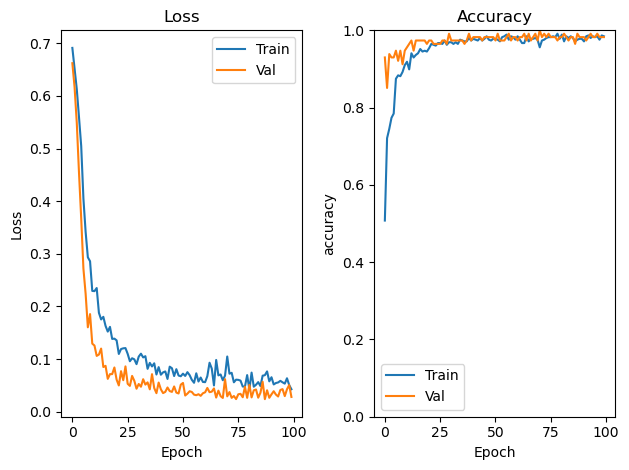

In [246]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.subplot(121)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label="Train")
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val')
    #plt.yscale('log')
    plt.legend()

    plt.subplot(122)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="Train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val')
    plt.ylim([0,1])
    plt.legend()
    plt.tight_layout()
    plt.show()
     
plot_history(history)

## Paso 6. Evaluar el modelo con el test set

Reporte de Clasificación

In [247]:
Y_pred = (model.predict(X_test) > 0.5) * 1
print(classification_report(Y_test, Y_pred, target_names=("Benigno", "Maligno")))

4/4 [==============================] - 0s 636us/step
              precision    recall  f1-score   support

     Benigno       0.99      0.99      0.99        72
     Maligno       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Matriz de Confusión


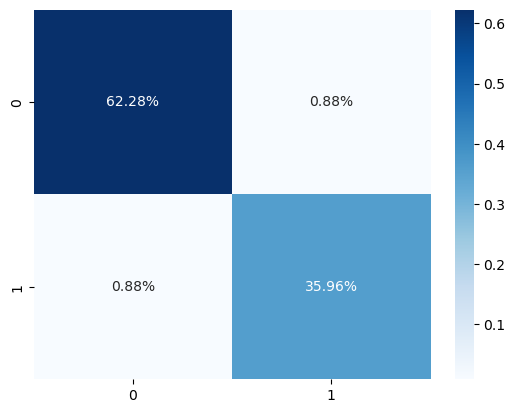

In [248]:
cm = confusion_matrix(Y_test, Y_pred)
_ = sns.heatmap(cm/np.sum(cm), fmt="0.2%", annot=True, cmap='Blues')